In [8]:
%load_ext autoreload
%autoreload 2
import numpy as np
from obspy import UTCDateTime
from matplotlib import pyplot as plt
import matplotlib as mpl
import ground_motion_qh
from ground_motion_qh.earthquake import EarthquakeCatalog
from ground_motion_qh.get_waveforms import get_stream_multiple_stations, raw_stream_to_amplitude_and_times
import os
from pathlib import Path
from pprint import pprint

base_dir = Path(ground_motion_qh.__file__).parent.parent

mpl.rcParams['figure.dpi'] = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:

#!!!!specify a directory!!!!
#download_name = "ANZA_SND_1994_M4_Picks_Test"
download_name = "ANZA_KNW_1994_M2.0_Picks"
data_dir = base_dir / "data" / "raw_data" / download_name


In [10]:

# explanation of buffers:

# (hypocenter) t1                                                                                            t2
# t0 time shift    pre-buffer     event time window     mid buffer     forecast time window      post buffer
# |------------||--------------||-------------------||--------------||---------- ... ---------||-------------|

analysis_metadata = np.load(data_dir / "metadata.npy", allow_pickle=True).item()

In [11]:
analysis_metadata

{'analysis_metadata': {'mid_buffer': 20,
  'forecast_time_window': 3600,
  'event_time_window': 30,
  'shift_times': False,
  'pre_buffer': 590.0000000000001,
  'post_buffer': 590.0000000000001},
 'station_metadata': {'stname': ['KNW'],
  'network': 'AZ',
  'org': 'IRIS',
  'latitude': 33.7141,
  'longitude': -116.7119,
  'start_time': '1982-10-01',
  'number_of_tries': 2}}

In [12]:
folder_names = os.listdir(data_dir/"data")
total_number_of_samples = len(folder_names)

/home/yiwasak2/QuakeHack/GroundMotion_QH/data/raw_data/ANZA_KNW_1994_M2.0_Picks/data/2015-01-25_17-27-32
/home/yiwasak2/QuakeHack/GroundMotion_QH/data/raw_data/ANZA_KNW_1994_M2.0_Picks/data/2015-01-22_15-44-07
/home/yiwasak2/QuakeHack/GroundMotion_QH/data/raw_data/ANZA_KNW_1994_M2.0_Picks/data/2015-01-18_13-13-54
/home/yiwasak2/QuakeHack/GroundMotion_QH/data/raw_data/ANZA_KNW_1994_M2.0_Picks/data/2015-02-01_15-44-43
/home/yiwasak2/QuakeHack/GroundMotion_QH/data/raw_data/ANZA_KNW_1994_M2.0_Picks/data/2015-01-18_15-42-36
/home/yiwasak2/QuakeHack/GroundMotion_QH/data/raw_data/ANZA_KNW_1994_M2.0_Picks/data/2015-01-10_23-19-13
/home/yiwasak2/QuakeHack/GroundMotion_QH/data/raw_data/ANZA_KNW_1994_M2.0_Picks/data/2015-02-01_16-22-18


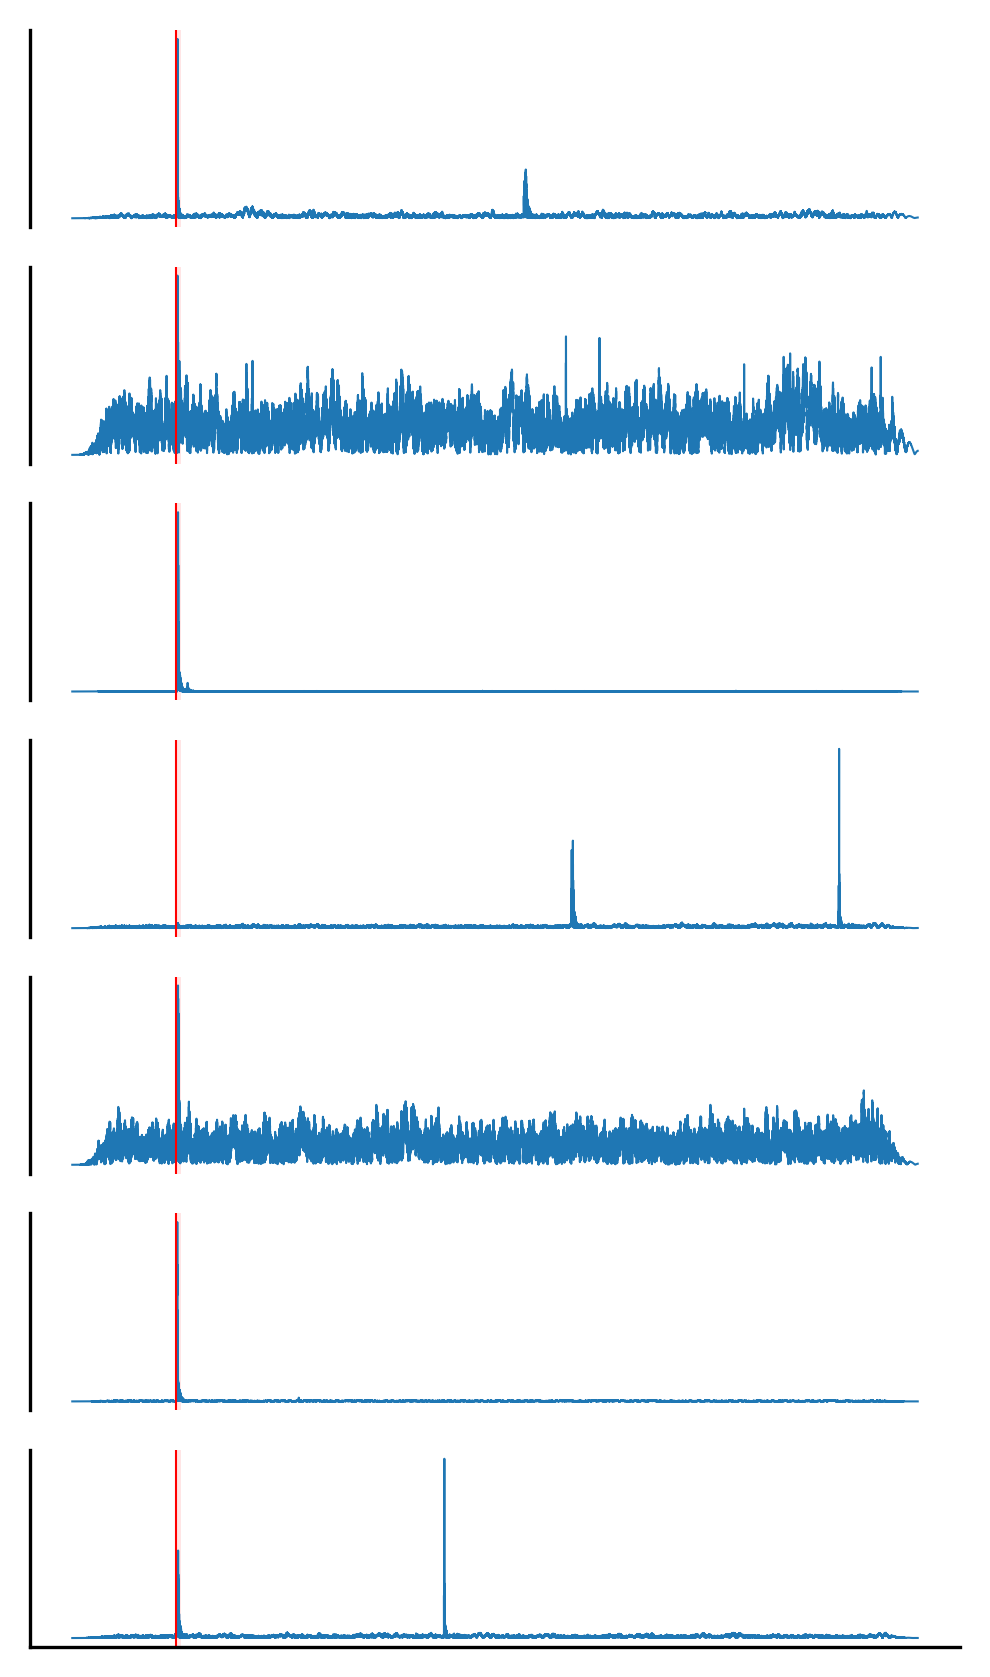

In [13]:

number_of_samples = len(folder_names)
random_sample_indices = np.random.randint(0, total_number_of_samples, number_of_samples)

fig, ax = plt.subplots(number_of_samples, 1, sharex=True, figsize=(4, number_of_samples))

for i, random_sample_index in enumerate(random_sample_indices):
    
    print(data_dir/"data"/folder_names[i])
    # load these files
    amplitude = np.load(data_dir/"data"/folder_names[i]/"amplitude.npy")
    #print(amplitude)
    times = np.load(data_dir/"data"/folder_names[i]/"times.npy")
    
    # plot the waveform
    ax[i].plot(times, amplitude,lw=0.5)
    
    ax[i].set(
        yticks=[],
        xticks=[],
    )
    
    ax[i].axvspan(
        analysis_metadata['analysis_metadata']['pre_buffer'],
        analysis_metadata['analysis_metadata']['pre_buffer'] + analysis_metadata['analysis_metadata']['event_time_window'],
        facecolor='r',
        alpha=0.1,
    )
    
    ax[i].axvline(
        analysis_metadata['analysis_metadata']['pre_buffer'],
        lw=0.5,
        c='r',
    )
    
    # ax[i].set(
    #     xlim=[
    #         analysis_metadata['analysis_metadata']['pre_buffer'] - analysis_metadata['analysis_metadata']['mid_buffer'], 
    #         analysis_metadata['analysis_metadata']['pre_buffer'] + analysis_metadata['analysis_metadata']['event_time_window'] + analysis_metadata['analysis_metadata']['mid_buffer']
    #     ]
    # )
    
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    
    if i != number_of_samples - 1:
        ax[i].spines['bottom'].set_visible(False)
        
    
    
    